In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

## 1-讀取資料

In [454]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [326]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 資料缺失情形一覽

In [327]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## 2-First EDA

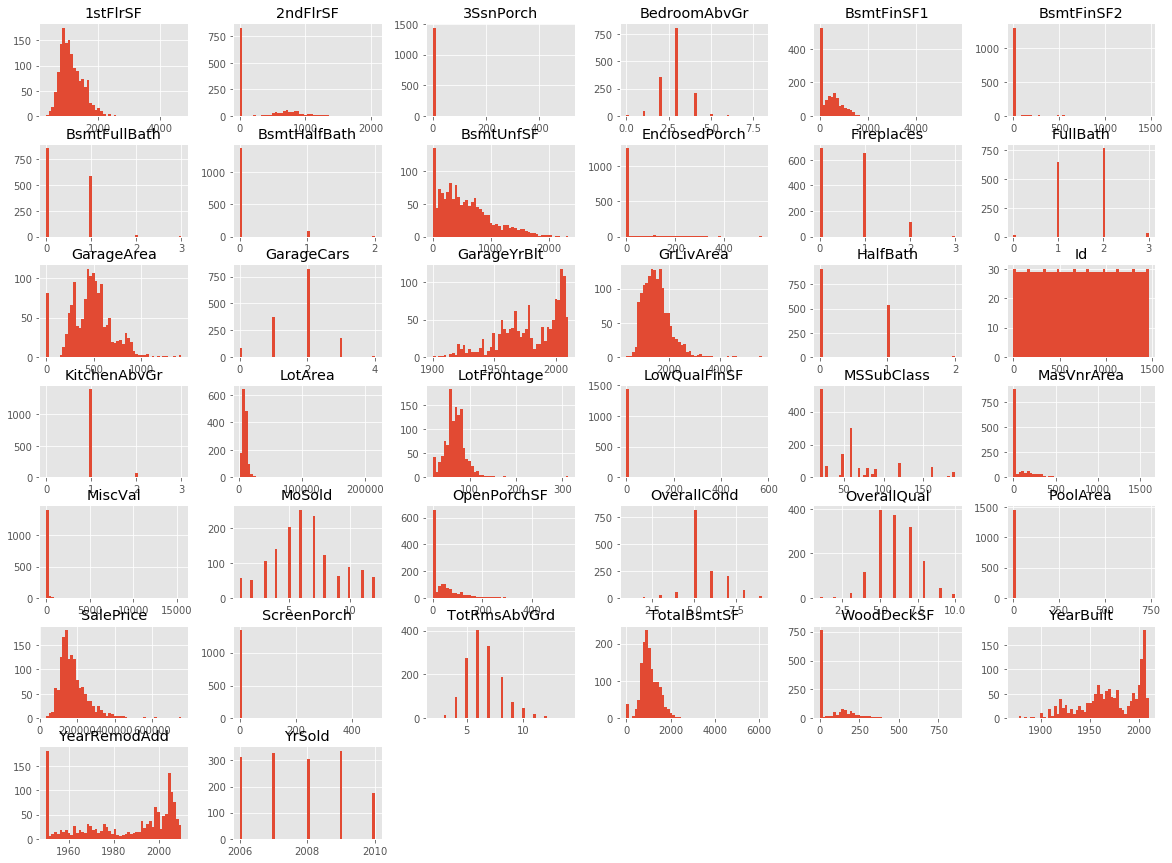

In [328]:
#各欄位的數據分布圖
train.hist(bins=50, figsize=(20, 15));

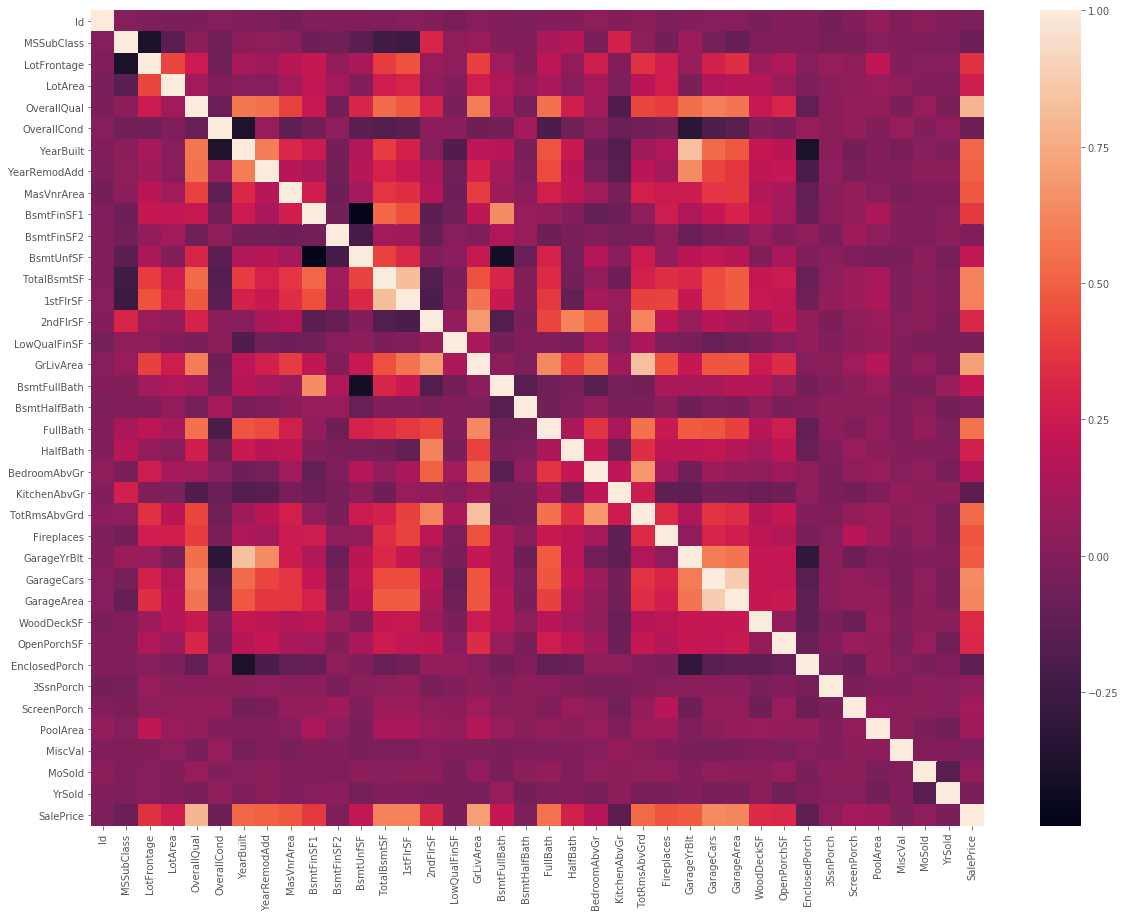

In [329]:
#欄位相關性熱度圖
plt.figure(figsize=(20, 15));
sns.heatmap(train.corr());

In [330]:
#房屋售價之皮爾森係數
train.corr().SalePrice.abs().sort_values()

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

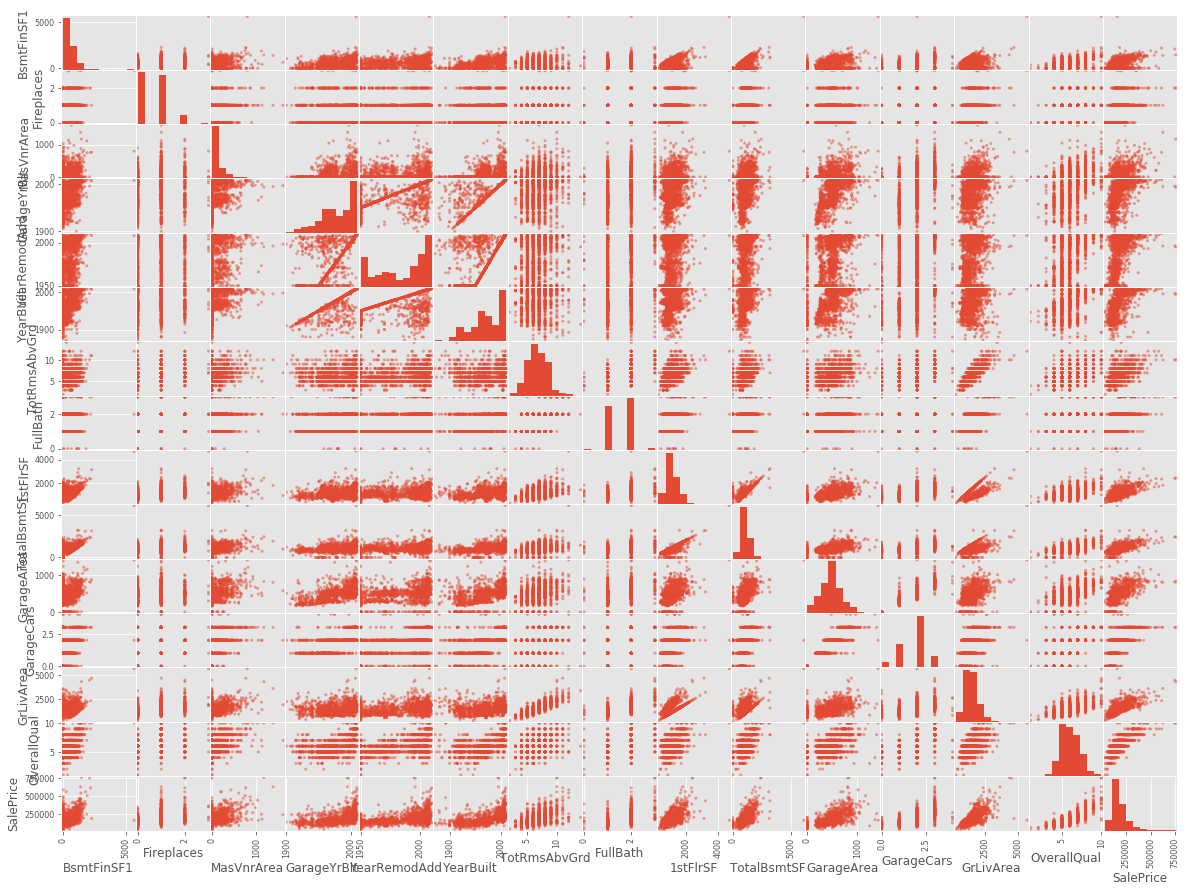

In [331]:
from pandas.plotting import scatter_matrix

top_15_features = train.corr().SalePrice.abs().sort_values().index[-15:]
scatter_matrix(train[top_15_features], figsize=(20, 15));

# 3.Modeling

In [332]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [333]:
def baseline_model():
    BASE_MODEL = RandomForestRegressor(random_state=2, n_estimators=250, min_samples_split=20)
    return BASE_MODEL

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) 

def train_and_evaluate_model(features, TARGET='SalePrice'):
    global train
    # performence on training set
    train_x = train.copy()[features]
    train_y = train.copy()[TARGET]
    temp_model = baseline_model()
    temp_model.fit(train_x, train_y) 

    scores = cross_val_score(temp_model, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
    train_rmse_scores = np.sqrt(-scores)
    display_scores(train_rmse_scores)    

## BaseLine model

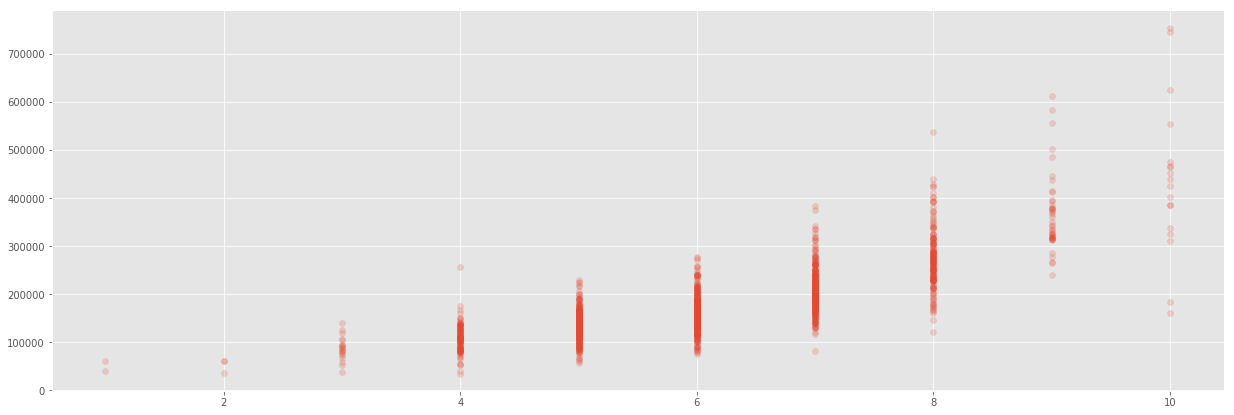

In [334]:
plt.figure(figsize=(21, 7))
plt.scatter(train['OverallQual'], train['SalePrice'], alpha=0.2);
plt.show()

In [335]:
#丟棄離群值
outlier_indices = train[(train.OverallQual == 10) & (train.SalePrice < 200000)].index
train = train[~train.index.isin(outlier_indices)]

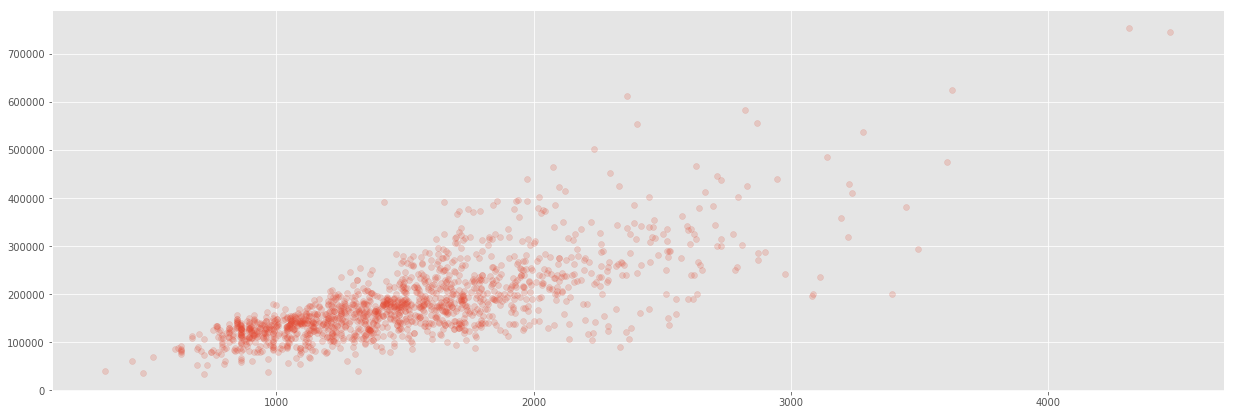

In [336]:
plt.figure(figsize=(21, 7))
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.2);
plt.show()

In [337]:
#丟棄離群值
outlier_indices = train[(train.GrLivArea > 4000)].index
train = train[~train.index.isin(outlier_indices)]

In [338]:
BASELINE_FEAT = ['OverallQual', 'GrLivArea']
train_and_evaluate_model(BASELINE_FEAT)

Scores: [33211.75294107 36193.48488265 31750.39542822 38337.33652148
 42423.34223196 33567.72939825 33722.43888184 33576.11740094
 38248.74598527 35445.58017927]
Mean: 35647.69238509511
Standard deviation: 3060.9611168913134


### Baseline model performence
<img src='images/baseline_model.jpg'>

## 房屋特徵
將影響房屋價格的要素分為1.房屋屬性(內部、外部)2.環境，從baseline特徵開始出發，透過對特徵的分析將相關的特徵一一加入

In [339]:
used_features = []

### BsmtQual

In [340]:
used_features.append('BsmtQual')

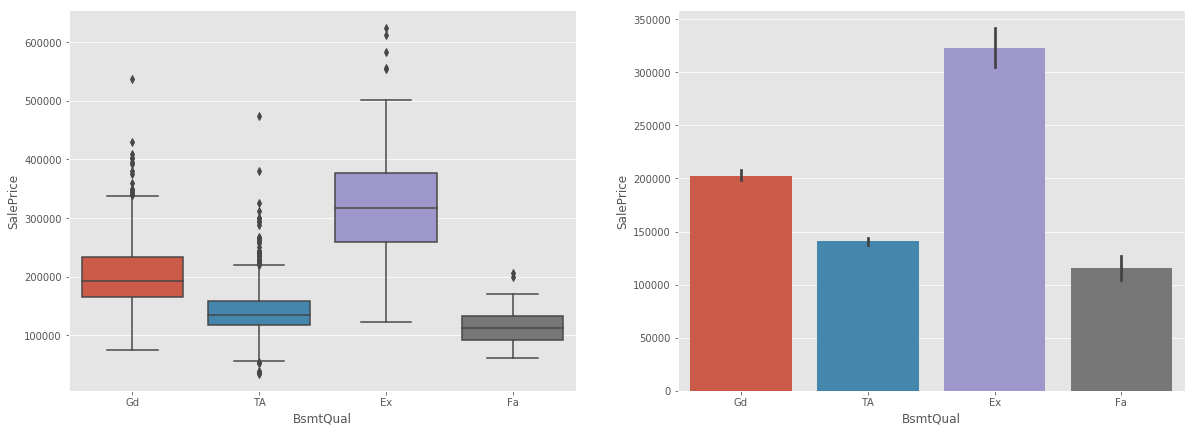

In [341]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, ax=ax[0]);
sns.catplot(x='BsmtQual', y='SalePrice', kind='bar', data=train, ax=ax[1]);
plt.close(2)
plt.show()

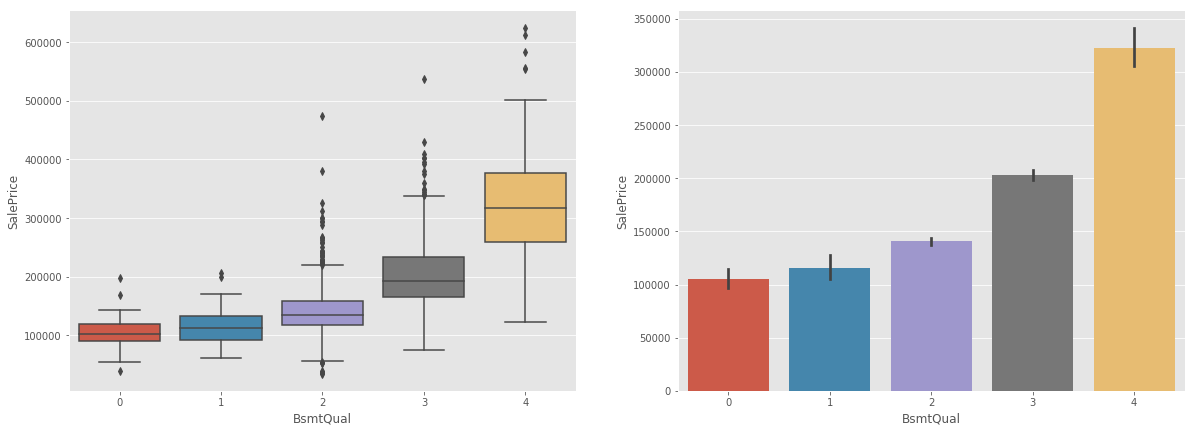

In [342]:
BsmtQual = {'Null':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
train.BsmtQual = train.BsmtQual.fillna('Null').map(BsmtQual)
test.BsmtQual = test.BsmtQual.fillna('Null').map(BsmtQual)

fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, ax=ax[0]);
sns.catplot(x='BsmtQual', y='SalePrice', kind='bar', data=train, ax=ax[1]);
plt.close(2)
plt.show()

### BsmtCond

In [343]:
used_features.append('BsmtCond')

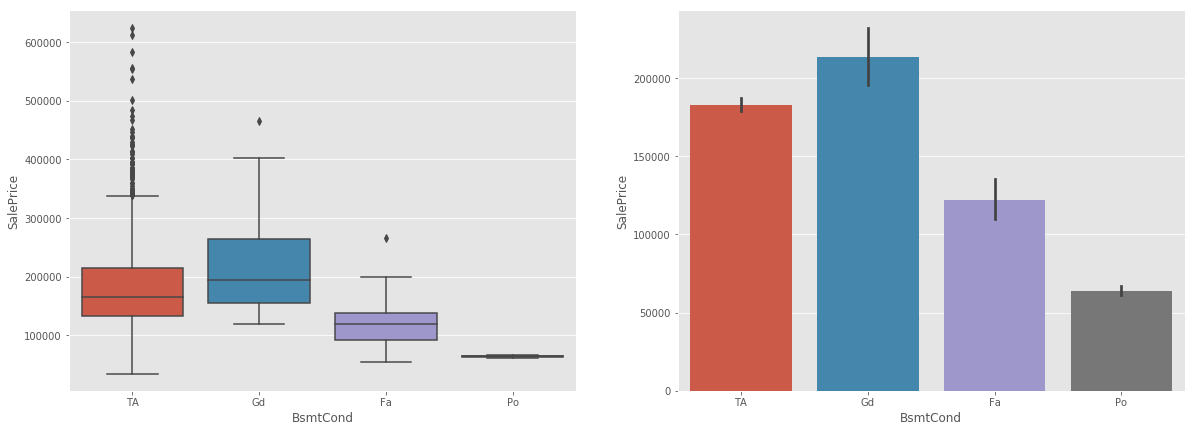

In [344]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtCond', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

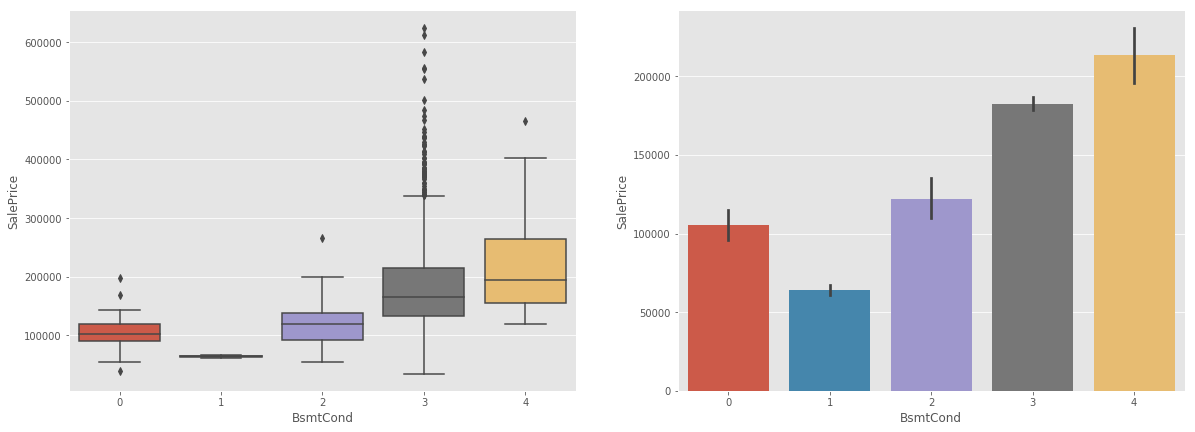

In [345]:
BsmtCond = {'Null':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4}
train.BsmtCond = train.BsmtCond.fillna('Null').map(BsmtCond)
test.BsmtCond = test.BsmtCond.fillna('Null').map(BsmtCond)

fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtCond', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### BsmtExposure

In [346]:
used_features.append('BsmtExposure')

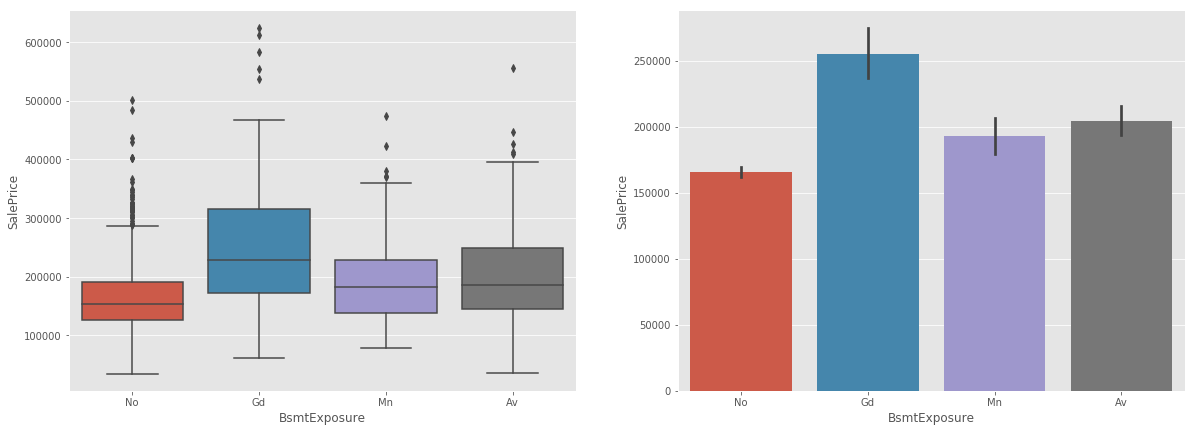

In [347]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtExposure', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

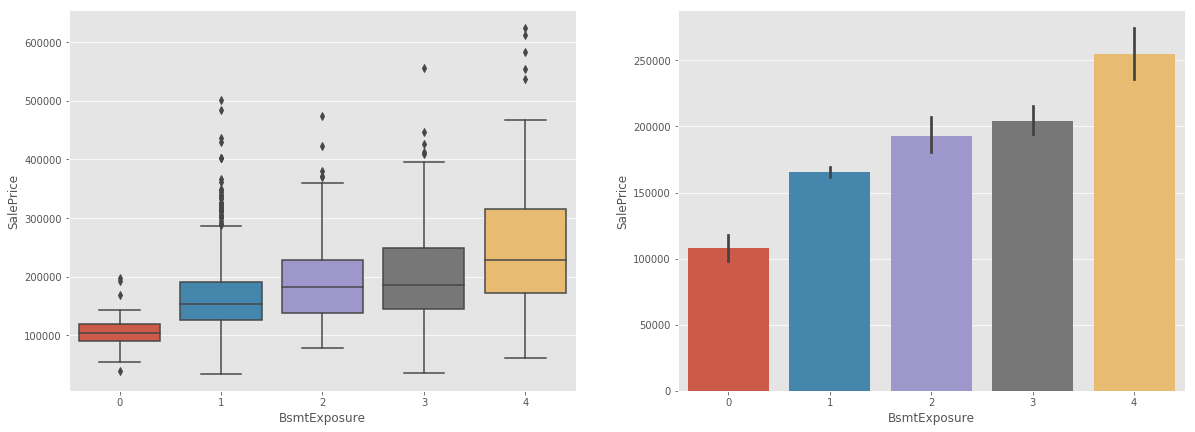

In [348]:
BsmtExposure = {'Null':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
train.BsmtExposure = train.BsmtExposure.fillna('Null').map(BsmtExposure)
test.BsmtExposure = test.BsmtExposure.fillna('Null').map(BsmtExposure)

fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtExposure', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### BsmtFinType1

In [349]:
used_features.append('BsmtFinType1')

In [350]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    414
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [351]:
train.BsmtFinType1.isnull().sum()

37

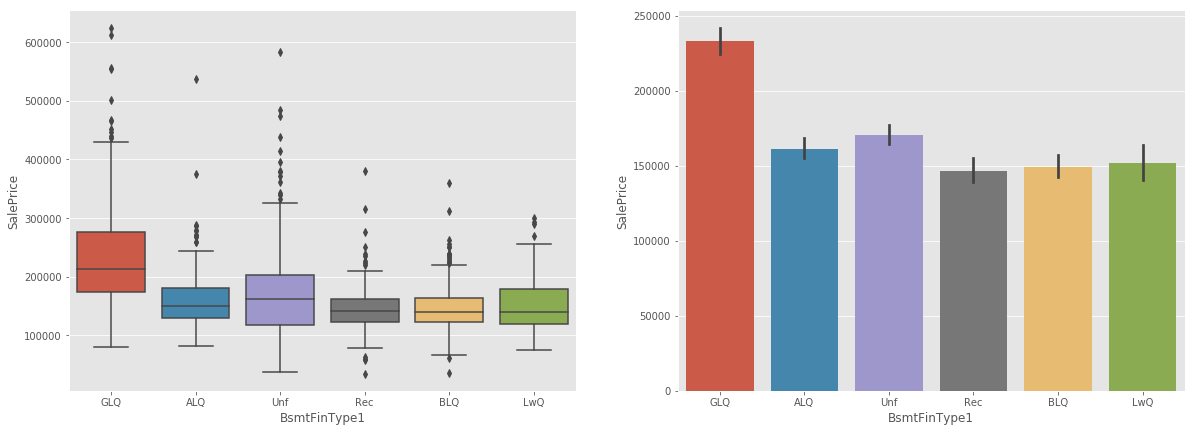

In [352]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtFinType1', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

In [353]:
train.BsmtFinType1 = train.BsmtFinType1.fillna('Null')
test.BsmtFinType1 = test.BsmtFinType1.fillna('Null')
train = pd.get_dummies(train, columns=['BsmtFinType1'])
test = pd.get_dummies(test, columns=['BsmtFinType1'])

### BsmtFinSF1

In [354]:
used_features.append('BsmtFinSF1')

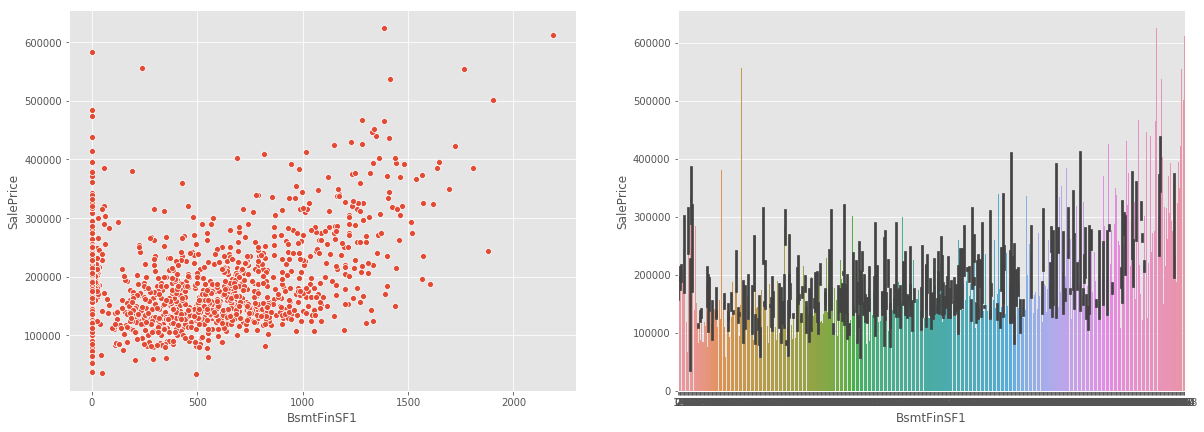

In [355]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.scatterplot(x="BsmtFinSF1", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtFinSF1', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

In [356]:
BsmtFinSF1_labels = ['small', 'medium', 'large', 'extra_large']
train.BsmtFinSF1 = pd.cut(train.BsmtFinSF1, bins=4, labels=BsmtFinSF1_labels)
test.BsmtFinSF1 = pd.cut(test.BsmtFinSF1, bins=4, labels=BsmtFinSF1_labels)
train = pd.get_dummies(train, columns=['BsmtFinSF1'])
test = pd.get_dummies(test, columns=['BsmtFinSF1'])

### BsmtFinType2

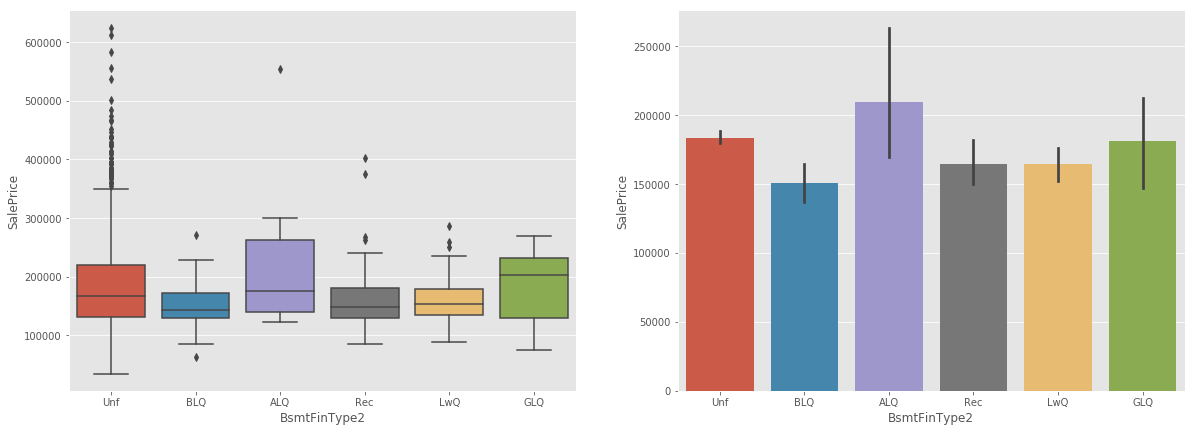

In [357]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='BsmtFinType2', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

In [358]:
train.BsmtFinType2 = train.BsmtFinType2.fillna('Null')
test.BsmtFinType2 = test.BsmtFinType2.fillna('Null')
train = pd.get_dummies(train, columns=['BsmtFinType2'])
test = pd.get_dummies(test, columns=['BsmtFinType2'])

### BsmtUnfSF

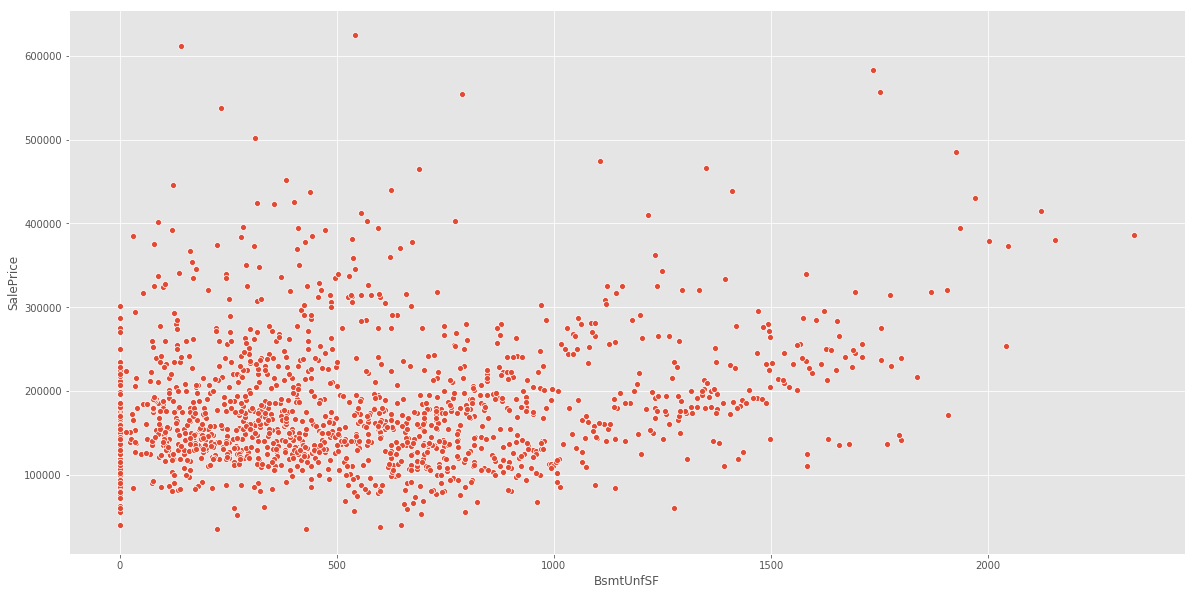

In [359]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.scatterplot(x="BsmtUnfSF", y="SalePrice", data=train, ax=ax)
plt.show()

In [360]:
BsmtUnfSF_labels = [1, 2, 3]
train.BsmtUnfSF = pd.cut(train.BsmtUnfSF, bins=3, labels=BsmtUnfSF_labels)
test.BsmtUnfSF = pd.cut(test.BsmtUnfSF, bins=3, labels=BsmtUnfSF_labels)
train = pd.get_dummies(train, columns=['BsmtUnfSF'])
test = pd.get_dummies(test, columns=['BsmtUnfSF'])

### TotalBsmtSF

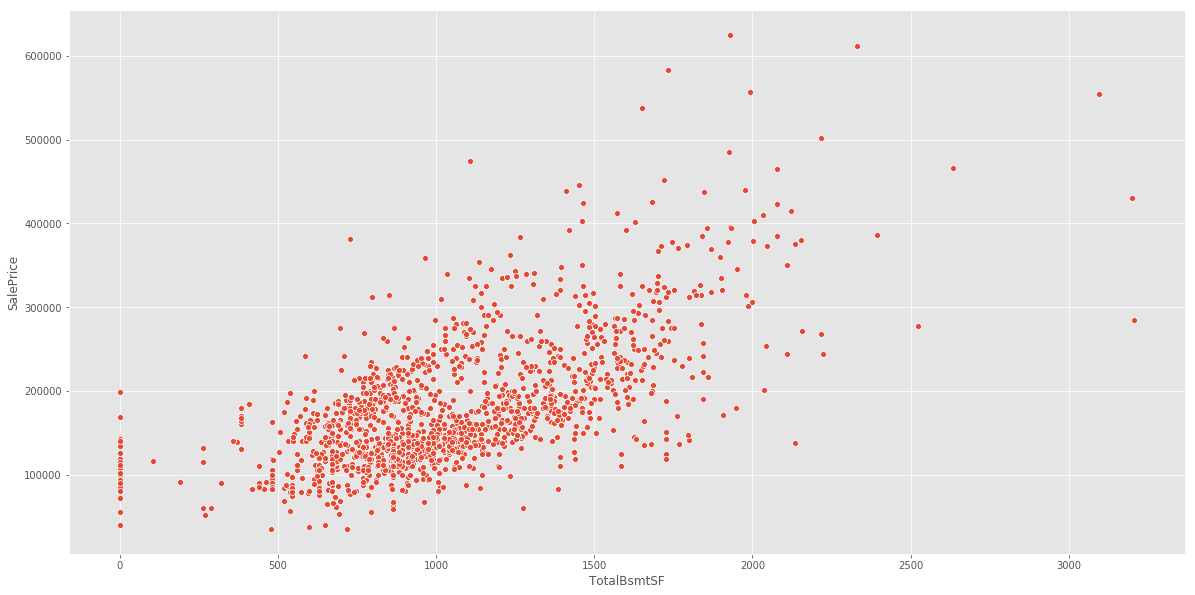

In [361]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train, ax=ax)
plt.show()

In [362]:
TotalBsmtSF_labels = [1, 2, 3, 4, 5, 6, 7, 8]
train.TotalBsmtSF = pd.cut(train.TotalBsmtSF, bins=8, labels=TotalBsmtSF_labels)
test.TotalBsmtSF = pd.cut(test.TotalBsmtSF, bins=8, labels=TotalBsmtSF_labels)
train = pd.get_dummies(train, columns=['TotalBsmtSF'])
test = pd.get_dummies(test, columns=['TotalBsmtSF'])

### 1stFlrSF

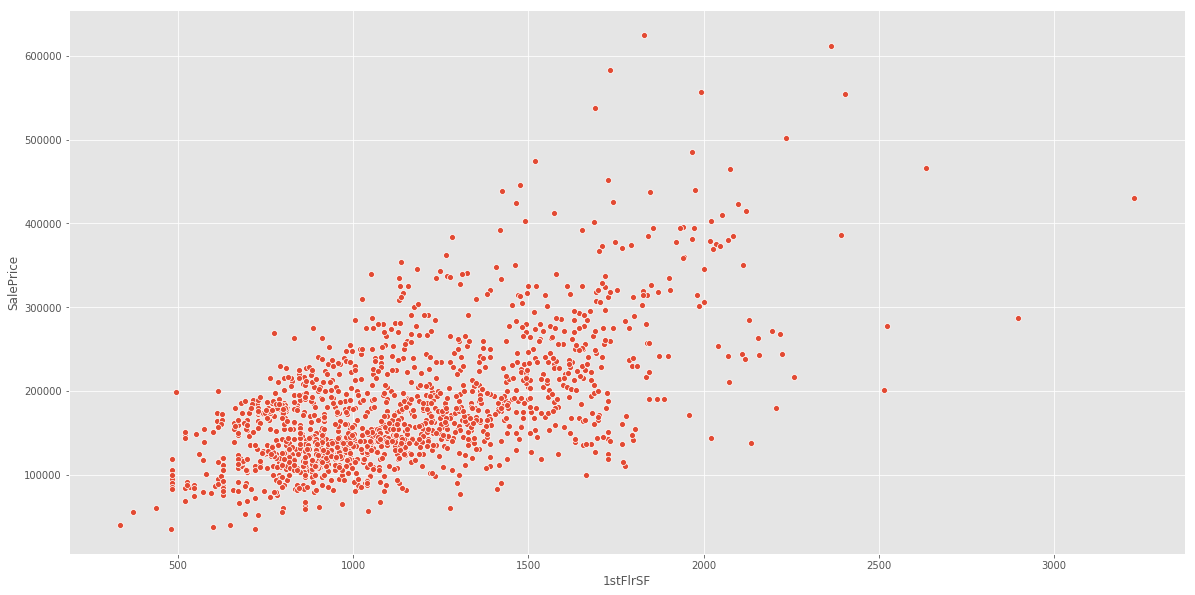

In [363]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=train, ax=ax)
plt.show()

In [364]:
FirstFlrSF_labels = [1, 2, 3, 4, 5, 6]
train['1stFlrSF'] = pd.cut(train['1stFlrSF'], bins=6, labels=FirstFlrSF_labels)
test['1stFlrSF'] = pd.cut(test['1stFlrSF'], bins=6, labels=FirstFlrSF_labels)
train = pd.get_dummies(train, columns=['1stFlrSF'])
test = pd.get_dummies(test, columns=['1stFlrSF'])

### 2ndFlrSF

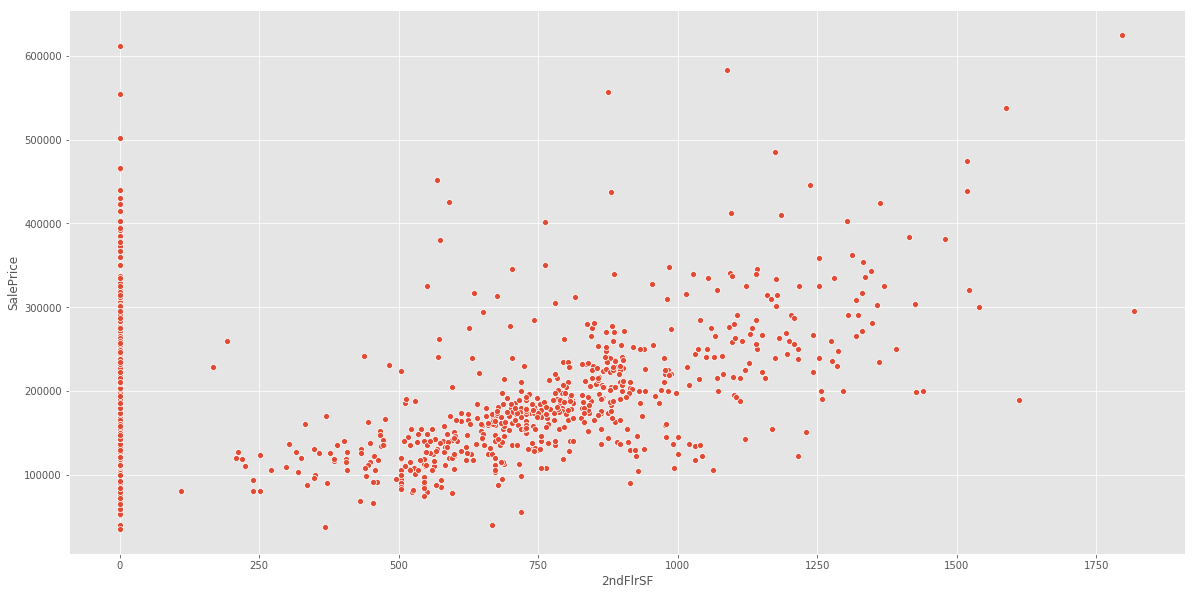

In [365]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.scatterplot(x="2ndFlrSF", y="SalePrice", data=train, ax=ax)
plt.show()

In [366]:
SecondFlrSF_labels = [1, 2, 3, 4, 5, 6]
train['2ndFlrSF'] = pd.cut(train['2ndFlrSF'], bins=6, labels=SecondFlrSF_labels)
test['2ndFlrSF'] = pd.cut(test['2ndFlrSF'], bins=6, labels=SecondFlrSF_labels)
train = pd.get_dummies(train, columns=['2ndFlrSF'])
test = pd.get_dummies(test, columns=['2ndFlrSF'])

### LowQualFinSF

In [367]:
train = train.drop(['LowQualFinSF'], axis=1)
test = test.drop(['LowQualFinSF'], axis=1)

### Bathrooms

In [368]:
train['total_bathrooms'] = train['BsmtHalfBath'] + train['BsmtFullBath'] + train['HalfBath'] + train['FullBath']
test['total_bathrooms'] = test['BsmtHalfBath'] + test['BsmtFullBath'] + test['HalfBath'] + test['FullBath']

### KitchenQual

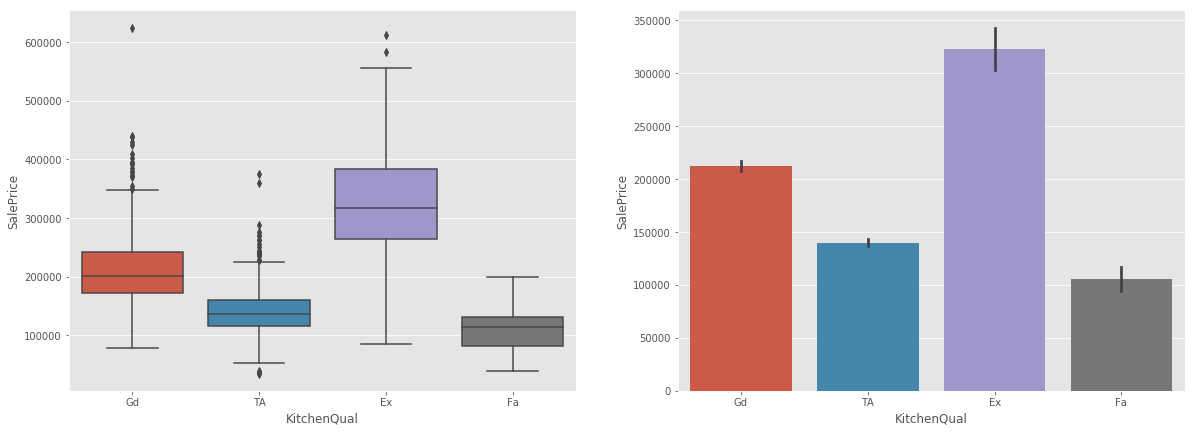

In [369]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='KitchenQual', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

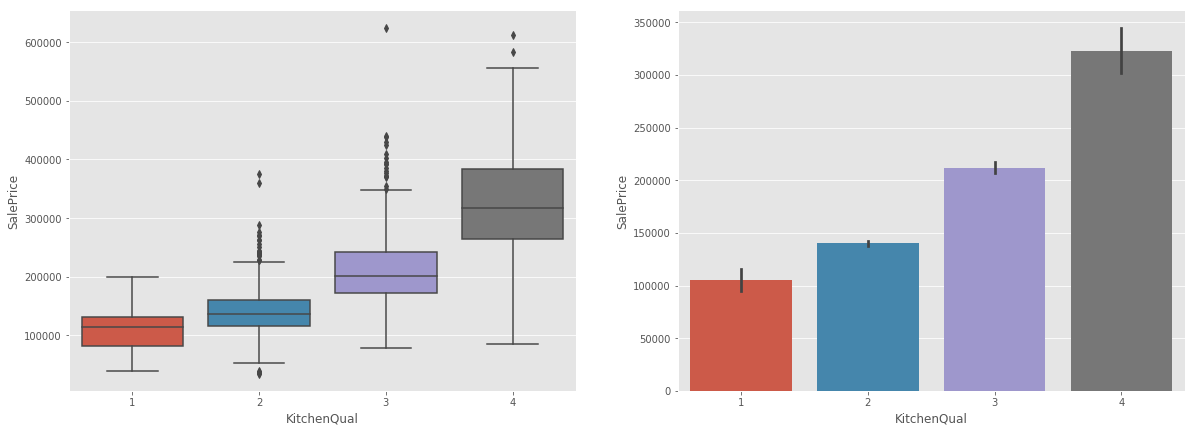

In [370]:
KitchenQual = {'Null':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
train.KitchenQual = train.KitchenQual.fillna('Null').map(KitchenQual)
test.KitchenQual = test.KitchenQual.fillna('Null').map(KitchenQual)

fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='KitchenQual', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### BsmtFinSF2

In [371]:
train = train.drop(['BsmtFinSF2'], axis=1)
test = test.drop(['BsmtFinSF2'], axis=1)

### TotRmsAbvGrd

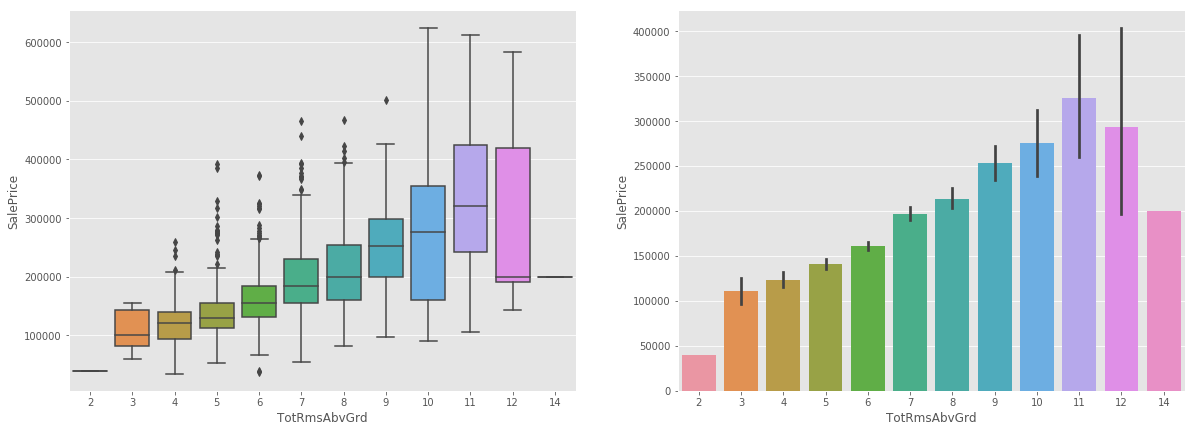

In [372]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='TotRmsAbvGrd', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### Fireplaces

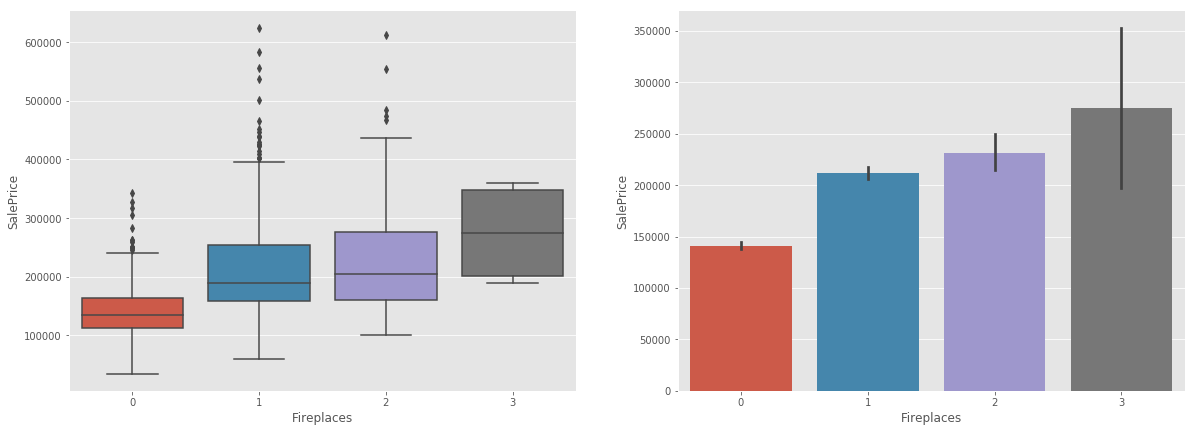

In [373]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='Fireplaces', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### FireplaceQu

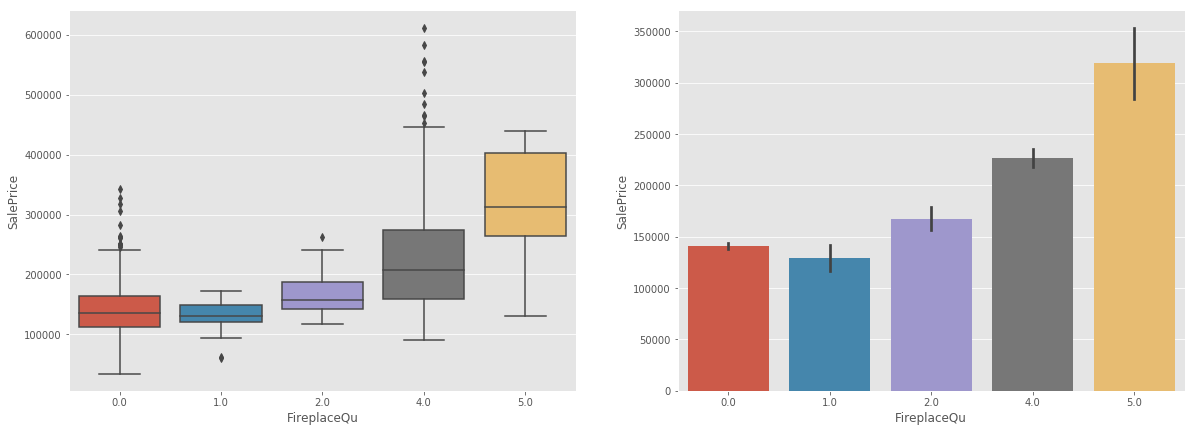

In [374]:
FireplaceQu = {'Null':0, 'Po':1, 'Fa':2, 'Ta':3, 'Gd':4, 'Ex':5}
train.FireplaceQu = train.FireplaceQu.fillna('Null').map(FireplaceQu)
test.FireplaceQu = test.FireplaceQu.fillna('Null').map(FireplaceQu)

fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='FireplaceQu', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()

### GrLivArea

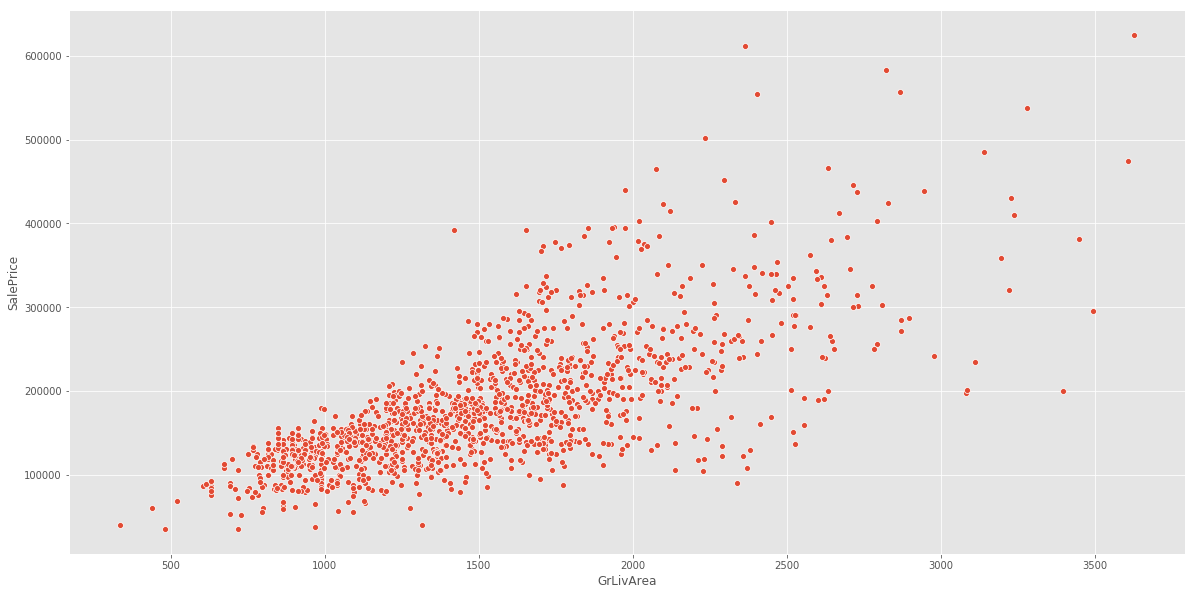

In [375]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train, ax=ax)
plt.show()

In [376]:
GrLivArea_labels = [1, 2, 3, 4, 5, 6]
train['GrLivArea'] = pd.cut(train['GrLivArea'], bins=6, labels=GrLivArea_labels)
test['GrLivArea'] = pd.cut(test['GrLivArea'], bins=6, labels=GrLivArea_labels)
train = pd.get_dummies(train, columns=['GrLivArea'])
test = pd.get_dummies(test, columns=['GrLivArea'])

### MSSubClass

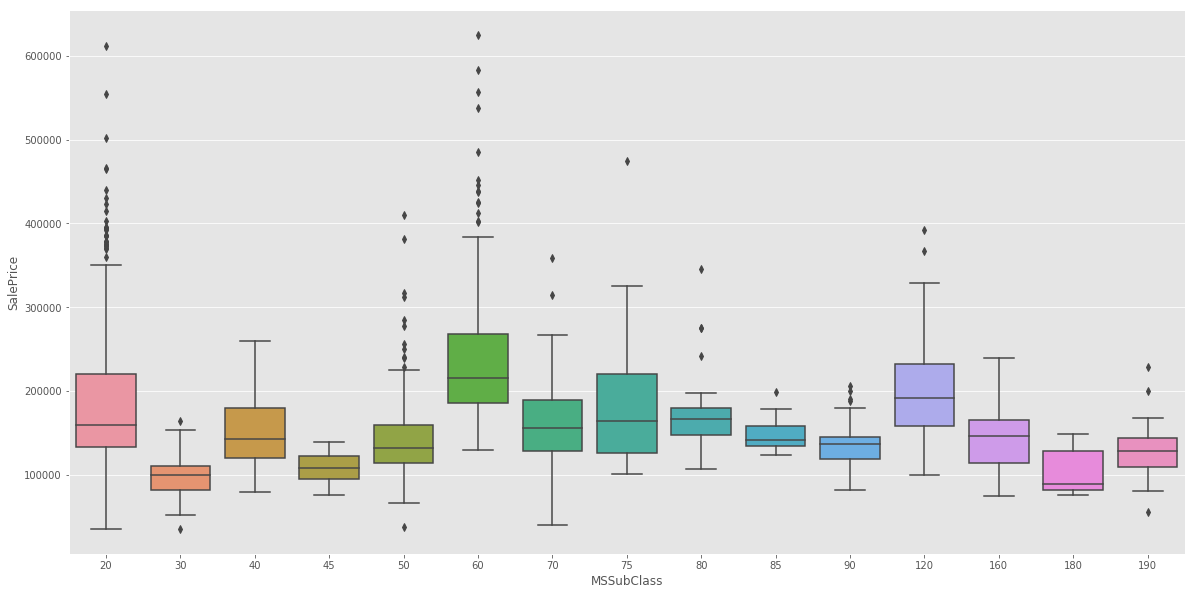

In [377]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=train, ax=ax)
plt.close(2)
plt.show()

In [378]:
train = pd.get_dummies(train, columns=['MSSubClass'])
test = pd.get_dummies(test, columns=['MSSubClass'])

### BldgType

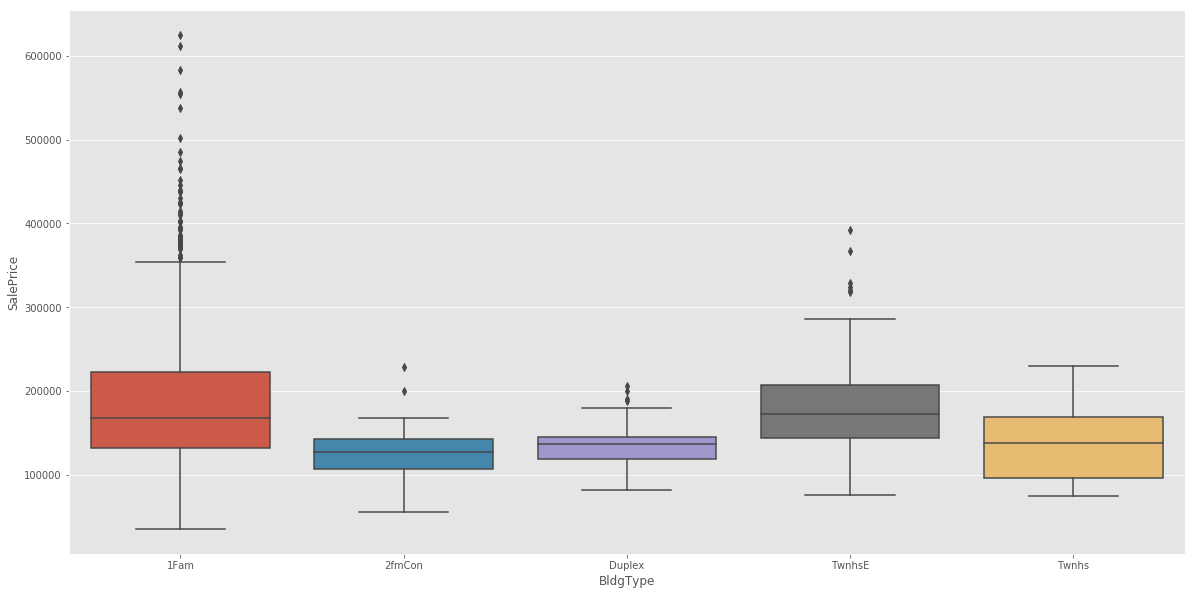

In [379]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, ax=ax)
plt.close(2)
plt.show()

In [380]:
train = pd.get_dummies(train, columns=['BldgType'])
test = pd.get_dummies(test, columns=['BldgType'])

### HouseStyle

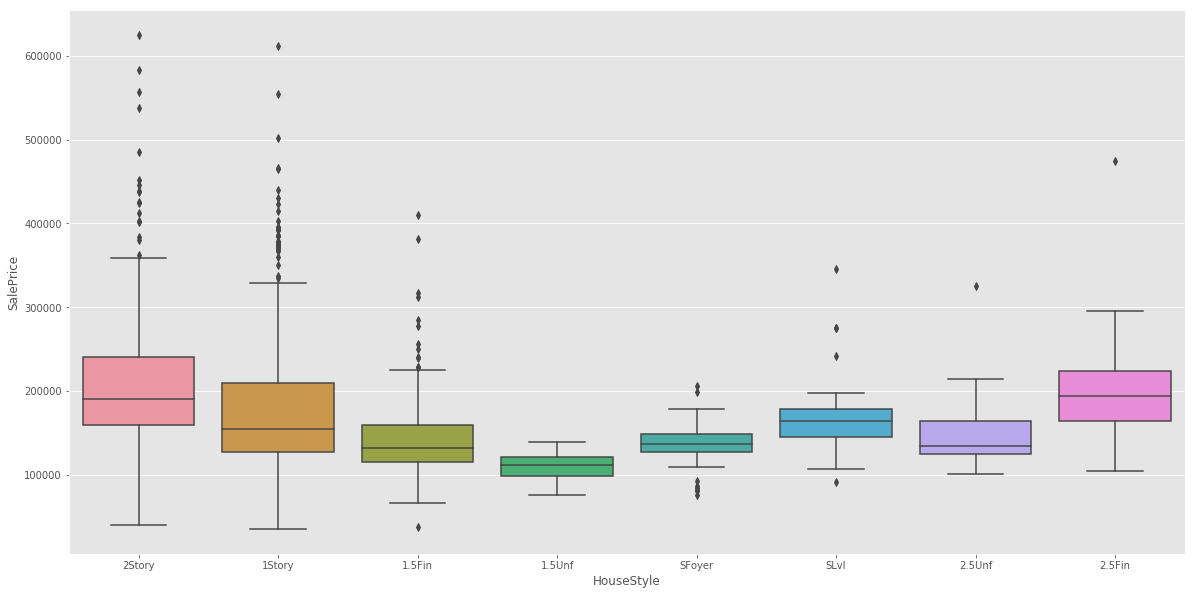

In [381]:
fig, ax = plt.subplots(figsize=(20, 10), ncols=1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, ax=ax)
plt.close(2)
plt.show()

In [382]:
train = pd.get_dummies(train, columns=['HouseStyle'])
test = pd.get_dummies(test, columns=['HouseStyle'])

### OverallCond

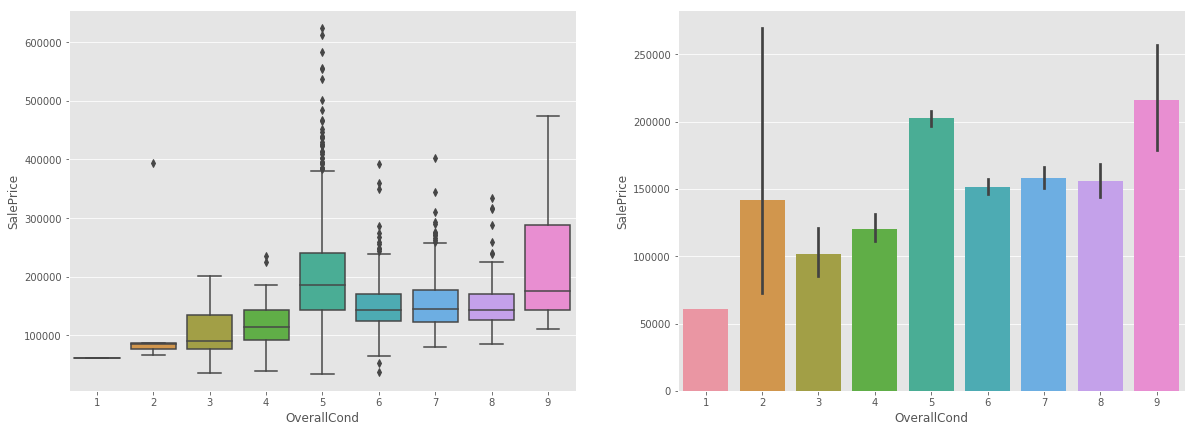

In [383]:
fig, ax = plt.subplots(figsize=(20, 7), ncols=2)
sns.boxplot(x="OverallCond", y="SalePrice", data=train, ax=ax[0])
sns.catplot(x='OverallCond', y='SalePrice', kind='bar', data=train, ax=ax[1])
plt.close(2)
plt.show()